<!-- # CNN autoencoder and Clustering from MTRX data

Use this notebook to load Scienta Omicron Matrix format SPM data and create standardised images for machine learning training and analysis. The code can generate both JPG image data, useful for manually checking the data, and windowed numpy data that can be loaded into ML models. 

The notebook then creates an autoencoder for training on a large dataset, followed by KMEANS clustering. 

**Author**: Steven R. Schofield  
**Created**: November, 2024 -->

# CASTEP - Si lattice parameter optimisations
## Steven R. Schofield (Universtiy College London) May 2025

### Load required modules

In [1]:
import sys
from pathlib import Path

# Define candidate paths using Path objects
module_path_list = [
    Path('/Users/steven/academic-iCloud/Python/modules'),
    Path('/hpc/srs/Python/modules')
]

data_path_list = [
    Path('/Users/steven/academic-iCloud/Calculations/castep/'),
    Path('/hpc/srs/Python-data')
]

# Resolve actual paths
module_path = next((p for p in module_path_list if p.exists()), None)
data_path = next((p for p in data_path_list if p.exists()), None)

# Check and report missing paths
if module_path is None:
    print("Error: Could not locate a valid module path.")
if data_path is None:
    print("Error: Could not locate a valid data path.")

if module_path is None or data_path is None:
    sys.exit(1)

# Add module_path to sys.path if needed
if str(module_path) not in sys.path:
    sys.path.insert(0, str(module_path))

# Print resolved paths
print(f"module_path = {module_path}")
print(f"data_path = {data_path}")

module_path = /Users/steven/academic-iCloud/Python/modules
data_path = /Users/steven/academic-iCloud/Calculations/castep


In [2]:
# # Ensure modules are reloaded 
%load_ext autoreload
%autoreload 2

# Import standard modules
import numpy as np
import pandas as pd
import os

# Import custom module
import SRSCALCUTILS.castep_tools as ct

from IPython.display import display, Image as StaticImage

### Job paths

In [3]:
# Parameters for windows creation
# General
job_folder = 'work-2025/si_lattice'
job_path = data_path / job_folder
verbose = False             # Set this True to print out more information

# Print resolved paths
print(f"job_path = {job_path}")

job_path = /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice


### Create CASTEP input files

In [4]:
params = {'task' : 'geomopt',
          'xc_functional'           : 'PBE',
#          'basis_precision'         : 'precise',         #coarse | medium | fine | precise OR 'cut_off_energy' : 750,
          'cut_off_energy'          : 700,
          'spin_polarised'          : 'false',
          'write_cell_structure'    : 'true',
          'charge'                  : 0,
          'nextra_bands'            : 6,
          'geom_energy_tol'         : 0.00005,          # default: 0.00005 eV 
          'geom_disp_tol'           : 0.002,            # default: 0.002 Ang.
          'geom_max_iter'           : 100,              # default: 30
          'geom_convergence_win'    : 2,                # default: 2
          'max_scf_cycles'          : 300               # default: 30
          }              

In [5]:
# 

filename = "silicon"
title = "silicon lattice parameter optimisation"

na=1
nb=1
nc=1

lattice_cart = np.array([
            [2.7,     2.7,     0.0],
            [2.7,     0.0,     2.7],
            [0.0,     2.7,     2.7,]
        ])

positions_frac = np.array([
            ['Si', 0.0,  0.0,  0.0],
            ['Si', 0.25,  0.25,  0.25],
        ])

constraints = np.array([
            [1,  1,  1],
            [0,  0,  0]
        ])

kpoints_mp_grid = np.array([8, 8, 8])

fix_all_ions = True
symmetry_generate=False
symmetry_tol = 0.01

In [6]:
# If it doesn’t exist, create it (including any missing parent folders)
if not os.path.isdir(job_path):
    os.makedirs(job_path, exist_ok=True)

# Now safely switch into it
os.chdir(job_path)

print("Now in:", os.getcwd())
print("Files:", os.listdir())

Now in: /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/academic/Calculations/castep/work-2025/si_lattice
Files: ['silicon-800.cst_esp', 'silicon-200.check', 'silicon-500.param', 'silicon-700.castep', 'silicon-600.castep', 'silicon-200-out.cell', 'silicon-nextra-8.castep_bin', 'silicon-700.geom', 'silicon-nextra-10.geom', 'silicon-nextra-4.check', 'silicon-nextra-10.castep_bin', 'silicon-nextra-12.bib', 'silicon-900.bib', 'silicon-nextra-6.bib', 'silicon-nextra-6.check', 'silicon-500.cst_esp', 'silicon-nextra-6.castep', 'silicon-700.cell', 'silicon-nextra-4.bib', 'silicon-nextra-10.bib', 'silicon-nextra-0-out.cell', 'silicon-500.bands', 'silicon-800.castep_bin', 'silicon-nextra-8.cst_esp', 'silicon-nextra-10.cell', 'silicon-nextra-2.cell', 'silicon-nextra-8.castep', 'silicon-900.cell', 'silicon-400.bands', 'silicon-nextra-0.castep_bin', 'silicon-nextra-4.castep', 'silicon-500.cell', 'silicon-nextra-2.check', 'silicon-1000.cell', 'silicon-nextra-14.bib', 'silicon-nextra-0.bib

### Convergence with cut off energy

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-200.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-200.cell

                                       FILE: silicon-200.castep                                      
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-200.castep   

No warnings found in: silicon-200.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-200.castep


,Parameter,Value
0,plane wave basis set cut-off,200.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


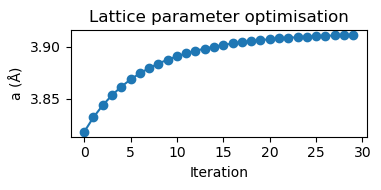

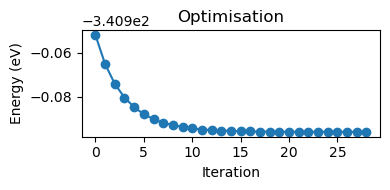

Final unit cell
	 [2.7656993, 2.7656993, 0.0]
	 [2.7656993, 0.0, 2.7656993]
	 [0.0, 2.7656993, 2.7656993]
Final a = 3.9113 b = 3.9113 c = 3.9113 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-300.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-300.cell

                                       FILE: silicon-300.castep                                      
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-300.castep   

No warnings found in: silicon-300.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-300.castep


,Parameter,Value
0,plane wave basis set cut-off,300.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


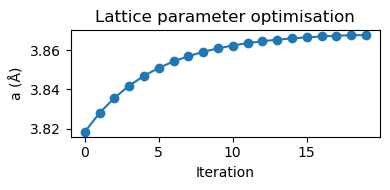

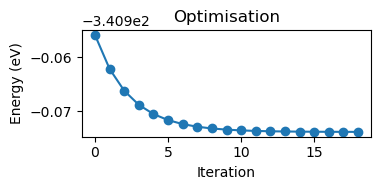

Final unit cell
	 [2.7347676, 2.7347676, -0.0]
	 [2.7347676, -0.0, 2.7347676]
	 [-0.0, 2.7347676, 2.7347676]
Final a = 3.8675 b = 3.8675 c = 3.8675 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-400.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-400.cell

                                       FILE: silicon-400.castep                                      
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-400.castep   

No warnings found in: silicon-400.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-400.castep


,Parameter,Value
0,plane wave basis set cut-off,400.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


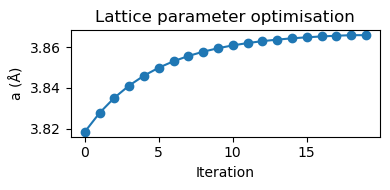

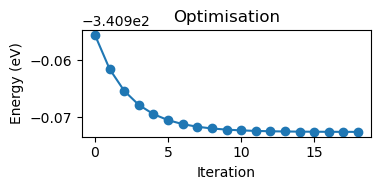

Final unit cell
	 [2.7336811, 2.7336811, -0.0]
	 [2.7336811, -0.0, 2.7336811]
	 [-0.0, 2.7336811, 2.7336811]
Final a = 3.8660 b = 3.8660 c = 3.8660 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-500.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-500.cell

                                       FILE: silicon-500.castep                                      
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-500.castep   

No warnings found in: silicon-500.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-500.castep


,Parameter,Value
0,plane wave basis set cut-off,500.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


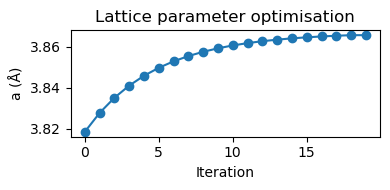

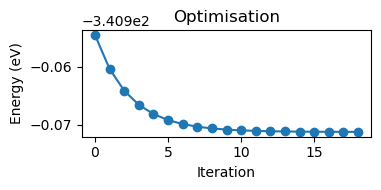

Final unit cell
	 [2.7334184, 2.7334184, -0.0]
	 [2.7334184, -0.0, 2.7334184]
	 [-0.0, 2.7334184, 2.7334184]
Final a = 3.8656 b = 3.8656 c = 3.8656 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-600.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-600.cell

                                       FILE: silicon-600.castep                                      
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-600.castep   

No warnings found in: silicon-600.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-600.castep


,Parameter,Value
0,plane wave basis set cut-off,600.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


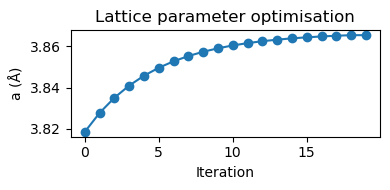

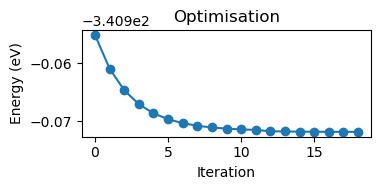

Final unit cell
	 [2.7333192, 2.7333192, -0.0]
	 [2.7333192, -0.0, 2.7333192]
	 [-0.0, 2.7333192, 2.7333192]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-700.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-700.cell

                                       FILE: silicon-700.castep                                      
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-700.castep   

No warnings found in: silicon-700.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-700.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


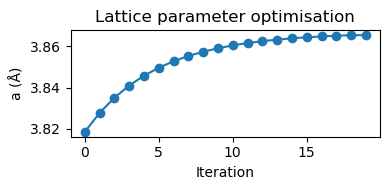

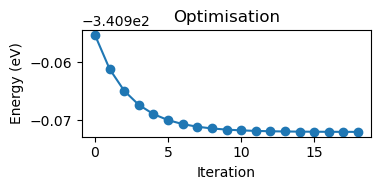

Final unit cell
	 [2.7333256, 2.7333256, -0.0]
	 [2.7333256, -0.0, 2.7333256]
	 [-0.0, 2.7333256, 2.7333256]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-800.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-800.cell

                                       FILE: silicon-800.castep                                      
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-800.castep   

No warnings found in: silicon-800.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-800.castep


,Parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


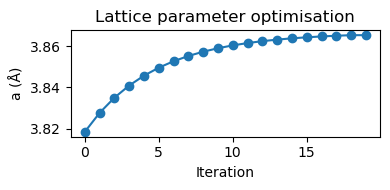

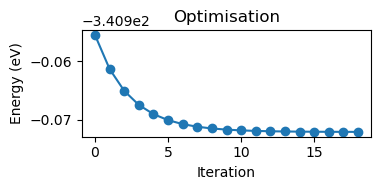

Final unit cell
	 [2.73327, 2.73327, -0.0]
	 [2.73327, -0.0, 2.73327]
	 [-0.0, 2.73327, 2.73327]
Final a = 3.8654 b = 3.8654 c = 3.8654 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-900.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-900.cell

                                       FILE: silicon-900.castep                                      
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-900.castep   

No warnings found in: silicon-900.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-900.castep


,Parameter,Value
0,plane wave basis set cut-off,900.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


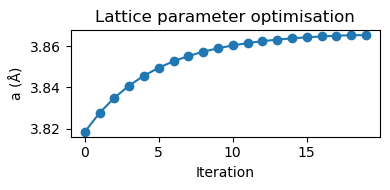

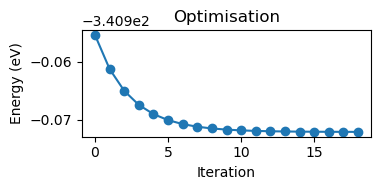

Final unit cell
	 [2.7333007, 2.7333007, -0.0]
	 [2.7333007, -0.0, 2.7333007]
	 [-0.0, 2.7333007, 2.7333007]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-1000.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-1000.cell

                                      FILE: silicon-1000.castep                                       
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-1000.castep   

No warnings found in: silicon-1000.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-1000.castep


,Parameter,Value
0,plane wave basis set cut-off,1000.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


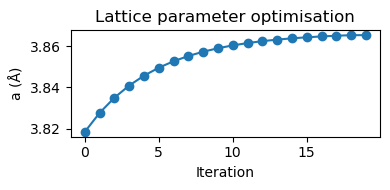

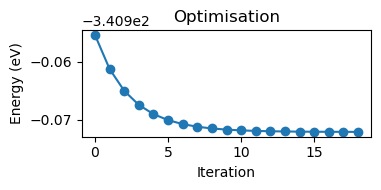

Final unit cell
	 [2.7333011, 2.7333011, -0.0]
	 [2.7333011, -0.0, 2.7333011]
	 [-0.0, 2.7333011, 2.7333011]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000



In [29]:
var_list = [200,300,400,500,600,700,800,900,1000]
alist = []
energy_list = []

for var in var_list:
    params['cut_off_energy'] = var
    filename = f"silicon-{var}"
    _ = ct.write_param_file(
        params,
        title = title,
        filename=filename,
        path=job_path,
        display_file=False
        )
    _ = ct.write_cell_file(
        title = title,
        path=job_path,
        filename=filename,
        na=na,
        nb=nb,
        nc=nc,
        lattice_cart=lattice_cart,
        positions_frac=positions_frac,
        constraints=constraints,
        fix_all_ions=True,
        symmetry_generate=symmetry_generate,
        symmetry_tol = symmetry_tol,
        kpoints_mp_grid=kpoints_mp_grid,
        display_file=False
    )

#    !zsh -l -c "castepmpi {filename}"

    castep_path = job_path / f"{filename}.castep"

    warnings = ct.get_warnings(castep_path, verbose=True)

    calculation_parameters = ct.get_calculation_parameters(castep_path)
    calculation_parameters_df = pd.DataFrame(list(calculation_parameters.items()), columns=['Parameter', 'Value'])

    lattice_optimisation = ct.get_lattice_parameters(castep_path)
    a_values = [blk['a'] for blk in lattice_optimisation]

    unit_cell, a, b, c, alpha, beta, gamma = ct.get_final_lattice_parameters(castep_path)

    energy_optimisation = ct.get_LBFGS_energies(castep_path)
    energies = [val for _, val in energy_optimisation]

    ct.print_filename(castep_path)
    print(warnings)
    display(calculation_parameters_df)

    ct.plot_sequence(a_values, xlabel='Iteration', ylabel='a (Å)', title='Lattice parameter optimisation')
    ct.plot_sequence(energies, xlabel='Iteration', ylabel='Energy (eV)', title='Optimisation')

    print(f"Final unit cell")
    for vector in unit_cell:
        print(f"\t {vector}")
    print(f"Final a = {a:.4f} b = {b:.4f} c = {c:.4f} alpha = {alpha:.4f} beta = {beta:.4f} gamma = {gamma:.4f}\n")

    alist.append(a)
    energy_list.append(energies[-1])


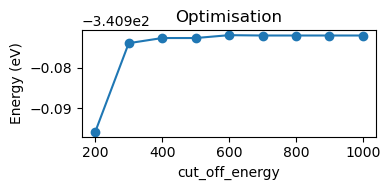

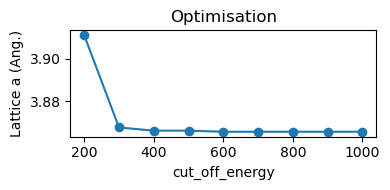

,Cut off energy (eV),Lattice constant (Å),Energy
0,200,3.911289,-340.995859
1,300,3.867545,-340.973870
2,400,3.866009,-340.972594
3,500,3.866009,-340.972594
4,600,3.865497,-340.971882
5,700,3.865506,-340.971967
6,800,3.865506,-340.971967
7,900,3.865506,-340.971967
8,1000,3.865506,-340.971967


In [26]:

ct.plot_sequence(energy_list, var_list, xlabel='cut_off_energy', ylabel='Energy (eV)', title='Optimisation')
ct.plot_sequence(alist, var_list, xlabel='cut_off_energy', ylabel='Lattice a (Ang.)', title='Optimisation')

import pandas as pd

df = pd.DataFrame({
    "Cut off energy (eV)": var_list,
    "Lattice constant (Å)": alist,
    "Energy": energy_list,
})

display( df)

### Convergence with nextrabands

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-0.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-0.cell

My NOSE is NUMB!


                                      FILE: silicon-nextra-0.castep                                       
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-0.castep   


===== WARNINGS in: silicon-nextra-0.castep =====
      full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-0.castep

 Warning in parameters_read: it appears you may not have specified enough 
                           - extra bands so you may have trouble with metals
                           - convergence as a consequence. Suggest you 
                           - consider setting nextra_bands=4 at least.
----------------------------------------
          slow the convergence and/or 

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,4.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


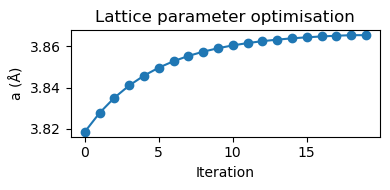

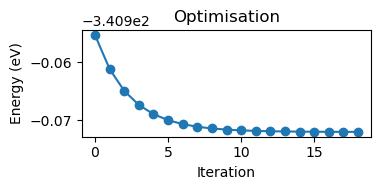

Final unit cell
	 [2.73332, 2.73332, -0.0]
	 [2.73332, -0.0, 2.73332]
	 [-0.0, 2.73332, 2.73332]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-2.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-2.cell

Home life as we understand it is no more natural to us than a cage is
to a cockatoo.
		-- George Bernard Shaw


                                      FILE: silicon-nextra-2.castep                                       
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-2.castep   


===== WARNINGS in: silicon-nextra-2.castep =====
      full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-2.castep

 Warning in parameters_read: it appears you may not have specified enough 
                      

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,6.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


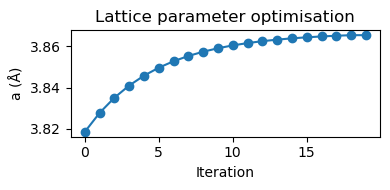

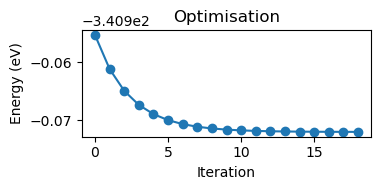

Final unit cell
	 [2.7333204, 2.7333204, -0.0]
	 [2.7333204, -0.0, 2.7333204]
	 [-0.0, 2.7333204, 2.7333204]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-4.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-4.cell

You can drive a horse to water, but a pencil must be lead.


                                      FILE: silicon-nextra-4.castep                                       
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-4.castep   

No warnings found in: silicon-nextra-4.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-4.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,8.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


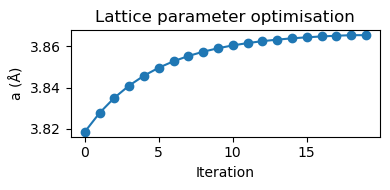

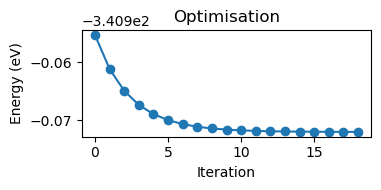

Final unit cell
	 [2.7333221, 2.7333221, -0.0]
	 [2.7333221, -0.0, 2.7333221]
	 [-0.0, 2.7333221, 2.7333221]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-6.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-6.cell

We don't believe in rheumatism and true love until after the first attack.
		-- Marie Ebner von Eschenbach


                                      FILE: silicon-nextra-6.castep                                       
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-6.castep   

No warnings found in: silicon-nextra-6.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-6.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


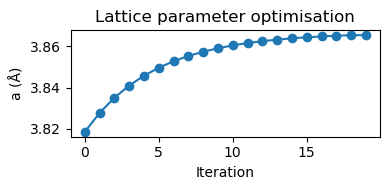

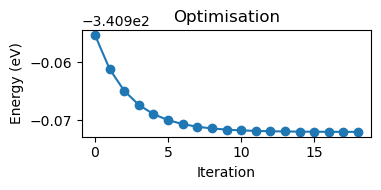

Final unit cell
	 [2.7333235, 2.7333235, -0.0]
	 [2.7333235, -0.0, 2.7333235]
	 [-0.0, 2.7333235, 2.7333235]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-8.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-8.cell

Cats are smarter than dogs.  You can't make eight cats pull a sled through
the snow.


                                      FILE: silicon-nextra-8.castep                                       
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-8.castep   

No warnings found in: silicon-nextra-8.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-8.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,12.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


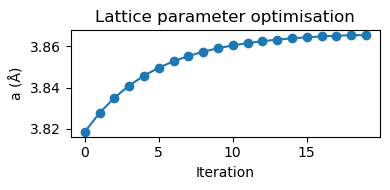

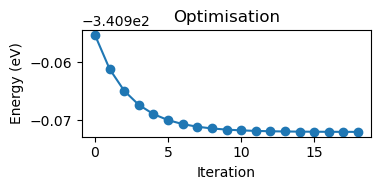

Final unit cell
	 [2.7333248, 2.7333248, -0.0]
	 [2.7333248, -0.0, 2.7333248]
	 [-0.0, 2.7333248, 2.7333248]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-10.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-10.cell

Information is the inverse of entropy.


                                       FILE: silicon-nextra-10.castep                                      
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-10.castep   

No warnings found in: silicon-nextra-10.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-10.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,14.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


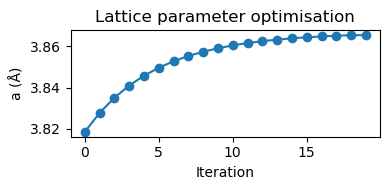

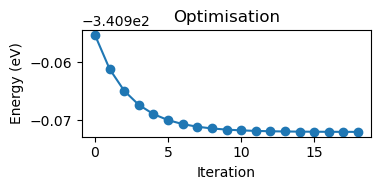

Final unit cell
	 [2.7333256, 2.7333256, -0.0]
	 [2.7333256, -0.0, 2.7333256]
	 [-0.0, 2.7333256, 2.7333256]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-12.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-12.cell

I put the shotgun in an Adidas bag and padded it out with four pairs of
tennis socks, not my style at all, but that was what I was aiming for:  If
they think you're crude, go technical; if they think you're technical, go
crude.  I'm a very technical boy.  So I decided to get as crude as possible.
These days, though, you have to be pretty technical before you can even
aspire to crudeness.
		-- William Gibson, "Johnny Mnemonic"


                                       FILE: silicon-nextra-12.castep                                      
   PATH: /Users/steven/academic-i

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,16.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


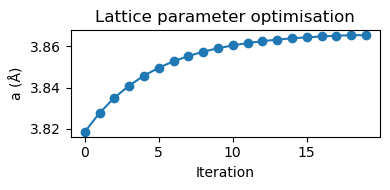

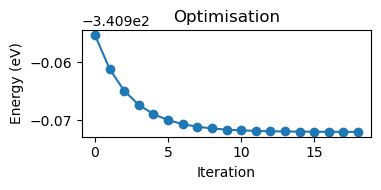

Final unit cell
	 [2.7333262, 2.7333262, -0.0]
	 [2.7333262, -0.0, 2.7333262]
	 [-0.0, 2.7333262, 2.7333262]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-14.param
Wrote cell file to: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-14.cell

Bug, n.:
	An aspect of a computer program which exists because the
	programmer was thinking about Jumbo Jacks or stock options when s/he
	wrote the program.

Fortunately, the second-to-last bug has just been fixed.
		-- Ray Simard


                                       FILE: silicon-nextra-14.castep                                      
   PATH: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_lattice/silicon-nextra-14.castep   

No warnings found in: silicon-nextra-14.castep
  full path: /Users/steven/academic-iCloud/Calculations/castep/work-2025/si_

,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,18.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,3 steps
9,smearing scheme,Gaussian


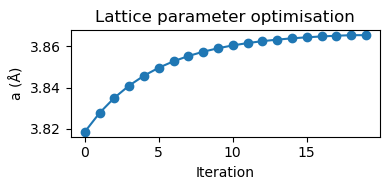

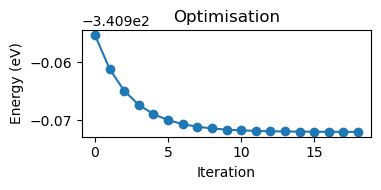

Final unit cell
	 [2.7333267, 2.7333267, -0.0]
	 [2.7333267, -0.0, 2.7333267]
	 [-0.0, 2.7333267, 2.7333267]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000



In [30]:
var_list = [0,2,4,6,8,10,12,14]
alist = []
energy_list = []
params['cut_off_energy'] = 700

for var in var_list:
    params['nextra_bands'] = var
    filename = f"silicon-nextra-{var}"
    _ = ct.write_param_file(
        params,
        title = title,
        filename=filename,
        path=job_path,
        display_file=False
        )
    _ = ct.write_cell_file(
        title = title,
        path=job_path,
        filename=filename,
        na=na,
        nb=nb,
        nc=nc,
        lattice_cart=lattice_cart,
        positions_frac=positions_frac,
        constraints=constraints,
        fix_all_ions=True,
        symmetry_generate=symmetry_generate,
        symmetry_tol = symmetry_tol,
        kpoints_mp_grid=kpoints_mp_grid,
        display_file=False
    )

    !zsh -l -c "castepmpi {filename}"

    castep_path = job_path / f"{filename}.castep"

    warnings = ct.get_warnings(castep_path, verbose=True)

    calculation_parameters = ct.get_calculation_parameters(castep_path)
    calculation_parameters_df = pd.DataFrame(list(calculation_parameters.items()), columns=['Parameter', 'Value'])

    lattice_optimisation = ct.get_lattice_parameters(castep_path)
    a_values = [blk['a'] for blk in lattice_optimisation]

    unit_cell, a, b, c, alpha, beta, gamma = ct.get_final_lattice_parameters(castep_path)

    energy_optimisation = ct.get_LBFGS_energies(castep_path)
    energies = [val for _, val in energy_optimisation]

    ct.print_filename(castep_path)
    print(warnings)
    display(calculation_parameters_df)

    ct.plot_sequence(a_values, xlabel='Iteration', ylabel='a (Å)', title='Lattice parameter optimisation')
    ct.plot_sequence(energies, xlabel='Iteration', ylabel='Energy (eV)', title='Optimisation')

    print(f"Final unit cell")
    for vector in unit_cell:
        print(f"\t {vector}")
    print(f"Final a = {a:.4f} b = {b:.4f} c = {c:.4f} alpha = {alpha:.4f} beta = {beta:.4f} gamma = {gamma:.4f}\n")

    alist.append(a)
    energy_list.append(energies[-1])


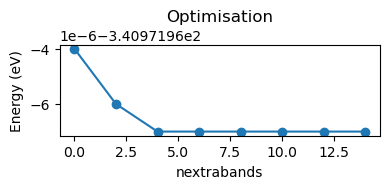

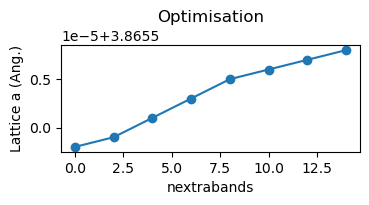

,nextrabands,Lattice constant (Å),Energy
0,0,3.865498,-340.971964
1,2,3.865499,-340.971966
2,4,3.865501,-340.971967
3,6,3.865503,-340.971967
4,8,3.865505,-340.971967
5,10,3.865506,-340.971967
6,12,3.865507,-340.971967
7,14,3.865508,-340.971967


In [33]:
ct.plot_sequence(energy_list, var_list, xlabel='nextrabands', ylabel='Energy (eV)', title='Optimisation')
ct.plot_sequence(alist, var_list, xlabel='nextrabands', ylabel='Lattice a (Ang.)', title='Optimisation')

import pandas as pd

df = pd.DataFrame({
    "nextrabands": var_list,
    "Lattice constant (Å)": alist,
    "Energy": energy_list,
})

display( df)